In [1]:
# import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from helpers import *
from implementations import *
from networks import *
import seaborn as sns
# import SVM

### Prepare the data ###

Procedure: 1. normalize coding for missing values: check each feature, assign NaN to values > 95% percentile. --> 2. check each row, drop the rows where over 50% of the features are NaN. Also remove the corresponding y  --> 3. Check each columns, drop the feature where over 50% of the rows are NaN or std == 0. Record the index for test set. --> 4. Handling NaN values: check for categorical feature (record the index), assign NaN to mean for non-categorical and majority label for categorial. --> 5. One-hot encoding for categorical data. --> 6. Standardize (skip categorical 0-1 columns)  --> 7. Regard a datapoint having more than 30% of the features with Z-score>2.5 as outliers, remove from x and corresponding y. --> 8. Data Augmentation --> 9. PCA 

In [2]:
x_train, x_test, y_train, train_ids, test_ids = load_csv_data("./data/dataset_to_release", sub_sample=False)

In [ ]:
print(x_train.shape)
print(y_train.shape)

(328135, 321)
(328135,)


(-2.3, 2.3)

<Figure size 640x480 with 0 Axes>

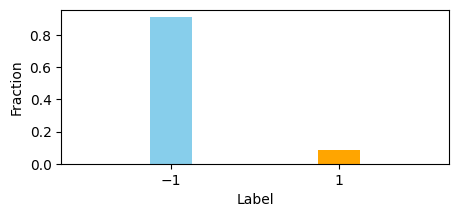

In [ ]:
# plot the distribution of the labels -1, 1
plt.figure()
plt.figure(figsize=(5, 2))
# plt the fraction
# plt.bar([-1, 1], [np.sum(y_train == -1), np.sum(y_train == 1)],width=0.5,color=['skyblue', 'orange'])
plt.bar([-1, 1], [np.sum(y_train == -1)/len(y_train), np.sum(y_train == 1)/len(y_train)],width=0.5,color=['skyblue', 'orange'])
# Set the figure size
plt.xticks([-1, 1])
plt.ylabel("Fraction")
plt.xlabel("Label")
plt.xlim(-2.3, 2.3)


# plt.hist(y_train, bins=2)

In [3]:
# thresholds for nans
row_nan = 0.6
feature_nan = 0.8
# threshold for categorical features
threshold_cat = 10
# threshold for outliers
z_threshold=2
feature_threshold=0.2

x_train_processed = x_train.copy()
y_train_processed = y_train.copy()

# transform y to 0-1 encoding
y_train_processed = process_y(y_train_processed)

# Uniform missing value encoding
# x_train_processed = normalize_nan(x_train_processed)
# Remove rows with too many nans
x_train_processed, y_train_processed = drop_rows(x_train_processed, y_train_processed, row_nan) # 0.55 remains 6101 rows
# x_train_processed.shape
# Remove features with too many nans
x_train_processed, nan_indices = drop_features(x_train_processed, feature_nan) # 0.5 remains 174 features
x_test_processed = x_test[:, nan_indices].copy()
print(x_train_processed.shape)

# get categorical feature indices
cat_indices = check_categorical(x_train_processed, threshold_cat)
# handling remaining nans
x_train_processed = fillna(x_train_processed, cat_indices)
x_test_processed = fillna(x_test_processed, cat_indices)

# One hot encoding for categorical features

x_train_processed, x_test_processed = one_hot_encoding(x_train_processed, x_test_processed, cat_indices)

#x_train_processed, train_mean, train_std = standardize(x_train_processed)
x_train_processed, train_max, train_min = normalization(x_train_processed)
# x_test_processed = (x_test_processed - train_mean) / train_std
x_test_processed, _, _  = normalization(x_test_processed, train_max, train_min)
# x_train_processed, y_train_processed = z_outlier_removal(x_train_processed, y_train_processed, z_threshold, feature_threshold)
print(x_train_processed.shape)
print(y_train_processed.shape)
# x_train_processed = add_bias(x_train_processed)


(317917, 201)
(317917, 568)
(317917,)


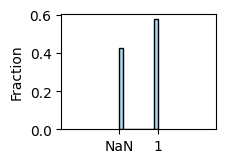

In [18]:
# plot the data distribution of #9 feature of x_train
column_data = x_train[:, 9]
nan_count = np.isnan(column_data).sum()
column_data_with_nan_marker = np.where(np.isnan(column_data), -1, column_data)
bins = [-1.5, -0.5, 0.5, 1.5]
plt.figure(figsize=(2, 1.5))
sns.histplot(column_data_with_nan_marker, bins=bins, kde=False, color='skyblue', binwidth=0.2,stat="probability")

plt.xticks([-1, 1], ['NaN', '1'], fontsize=10)
plt.xlim(-4, 4)
# plt.xlabel('Values of feature "CTELENUM"')
plt.ylabel('Fraction', fontsize=10)
  # A vertical line to indicate NaNs
plt.savefig('ctelenum.pdf', dpi=600, bbox_inches='tight')
# plt.show()



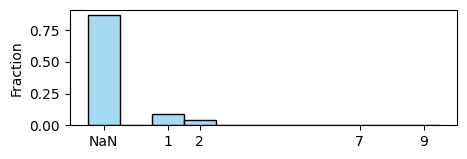

In [ ]:
# plot the data distribution of #41 feature of x_train
column_data = x_train[:, 41]
nan_count = np.isnan(column_data).sum()
column_data_with_nan_marker = np.where(np.isnan(column_data), -1, column_data)
unique_values = np.unique(column_data_with_nan_marker)
bins = np.arange(unique_values.min() - 0.5, unique_values.max() + 1.5, 1)
plt.figure(figsize=(5, 1.5))
sns.histplot(column_data_with_nan_marker, bins=bins, kde=False, color='skyblue', stat="probability", discrete=True)

plt.xticks([-1, 1], ['NaN', '1'])
xticks_labels = ['NaN' if int(val) == -1 else str(int(val)) for val in unique_values]
plt.xticks(unique_values, xticks_labels)
# 
# plt.xlabel('Values of feature "ASTHNOW"')
plt.ylabel('Fraction')
  # A vertical line to indicate NaNs

plt.show()

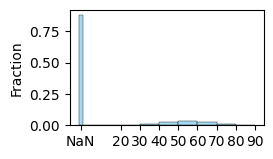

In [4]:
# plot the data distribution of #49 feature of x_train
column_data = x_train[:, 49]
nan_count = np.isnan(column_data).sum()
column_data_with_nan_marker = np.where(np.isnan(column_data), -1, column_data)
unique_values = np.unique(column_data_with_nan_marker)
bin_edges = np.concatenate([[-2, 0], np.arange(20, unique_values.max(),10)])
plt.figure(figsize=(2.5, 1.5))
sns.histplot(column_data_with_nan_marker, bins=bin_edges, kde=False, color='skyblue', stat="probability")
xticks = np.concatenate([[-1], np.arange(20, unique_values.max(),10)])
xtick_labels = ['NaN'] + [str(i) for i in np.arange(20, unique_values.max(), 10).astype(int)]
plt.xticks(xticks, xtick_labels, fontsize=10)


# plt.xlabel('Values of feature "DIABAGE2"')
plt.ylabel('Fraction',fontsize=10)
  # A vertical line to indicate NaNs
plt.savefig('diabage2.pdf', dpi=600, bbox_inches='tight')
# plt.show()

In [ ]:
x_test_processed.shape

(109379, 603)

In [ ]:
np.sum(y_train_processed==1)

550

In [ ]:
print(x_train_processed.shape)
print(y_train_processed.shape)
print(np.sum(x_train_processed.std(axis=0) == 0))

(6368, 586)
(6368,)
0


In [ ]:
# x_train_processed_orig = x_train.copy()
# x_train_processed_orig = fillna_with_mean(x_train_processed_orig, threshold=threshold_nan)
# x_train_processed_orig = standardize(x_train_processed_orig)
# x_train_processed_orig = polynomial_expansion_single(x_train_processed_orig, degree=2)
# x_train_processed_orig = standardize(x_train_processed_orig)
# x_train_processed_orig = add_bias(x_train_processed_orig)
# # add a column of ones
# y_train_processed_orig = y_train.copy()
# y_train_processed_orig = process_y(y_train_processed_orig)
# print(np.isnan(x_train_processed_orig).any())

In [ ]:
# print(x_train_processed_orig.shape)
# print(y_train_processed_orig.shape)

In [ ]:
# ## PCA feature selection 
# pre_train_data = x_train_processed.copy()

# x_pca, eig_vec, eig_val,weight = pca(pre_train_data, 200)
# print(weight)

In [ ]:
# x_pca.shape

In [ ]:
# cummulation = np.cumsum(weight)
## cummulation
# plt.plot(cummulation)

In [ ]:
# x_pca.shape

### Experiment ###

In [ ]:
# ## linear regression using all the features except for those having NaN values over 50% ##
# x_t, y_t, x_v, y_v = split_data(add_bias(x_train_processed), y_train_processed, 0.9)
# # x_t, y_t = data_augmentation(x_t, y_t)
# initial_w = np.random.randn(x_t.shape[1]) * 0.01
# w, loss = mean_square_error_gd(y_t, x_t, initial_w, max_iters=500, gamma=0.01)
# y_pred = x_v @ w
# y_pred_mean = np.mean(y_pred)
# y_pred = (y_pred > y_pred_mean).astype(int)
# predict_acc_pure(y_pred, y_v)
# predict_f1_pure(y_pred, y_v)

In [ ]:
# x_train_processed.shape

In [ ]:
# # logistic regression using all the features except for those having NaN values over 50% ##
# x_t, y_t, x_v, y_v = split_data(add_bias(x_train_processed), y_train_processed, 0.9)
# x_t, y_t = data_augmentation(x_t, y_t)
# initial_w = np.random.randn(x_t.shape[1]) * 0.01
# w, loss = logistic_regression(y_t, x_t, initial_w, max_iters=500, gamma=0.1)
# y_pred = sigmoid(x_v @ w)
# y_pred = (y_pred >= 0.7).astype(int)
# predict_acc_pure(y_pred, y_v)
# predict_f1_pure(y_pred, y_v)

In [ ]:
# # logistic regression
# x_t, y_t, x_v, y_v = split_data(add_bias(x_train_processed), y_train_processed, 0.9)
# x_t, y_t = data_augmentation(x_t, y_t)
# initial_w = np.random.randn(x_t.shape[1]) * 0.01
# w, loss = reg_logistic_regression(y_t, x_t, lambda_=0.1, initial_w=initial_w, max_iters=500, gamma=0.15)
# y_pred = (x_v @ w >= 0.75).astype(int)
# predict_acc_pure(y_pred, y_v)
# predict_f1_pure(y_pred, y_v)

In [ ]:
# # ridge regression using all the features except for those having NaN values over 50% ##
# x_t, y_t, x_v, y_v = split_data(add_bias(x_train_processed), y_train_processed, 0.9)
# x_t, y_t = data_augmentation(x_t, y_t)
# w, loss = ridge_regression(y_t, x_t, lambda_=0.01)
# y_pred = x_v @ w
# y_pred_mean = np.mean(y_pred)
# y_pred = (y_pred > y_pred_mean).astype(int)
# predict_acc_pure(y_pred, y_v)
# predict_f1_pure(y_pred, y_v)

#### Hinge loss gradient descent

In [ ]:
# accs = []
# f1 = []
# for i in range(10):
#     x_t, y_t, x_v, y_v = split_data(x_train_processed, y_train_processed, 0.9)
#     x_t, y_t = data_augmentation(x_t, y_t)
#     initial_w = np.random.randn(x_t.shape[1]) * 0.01
#     w, loss = hinge_regression(y_t, x_t, initial_w, lambda_=0.1, max_iters=500, gamma=0.01)
#     y_pred = ((x_v @ w) > 0.5).astype(int)
#     accs.append(predict_acc_pure(y_pred, y_v))
#     f1.append(predict_f1_pure(y_pred, y_v))
# print("Final accuracy score is: ", np.mean(accs))
# print("Final f1 score is: ", np.mean(f1))

In [ ]:
# import sklearn.svm as svm
# cls = svm.SVC(C=50, kernel='rbf')
# x_t, y_t, x_v, y_v = split_data(x_train_processed_hinge, y_train_processed_hinge, 0.9)
# cls.fit(x_t, y_t)
# y_pred = cls.predict(x_v)
# predict_acc_pure(y_pred, y_v)
# predict_f1_pure(y_pred, y_v)

#### PCA

In [ ]:
# ## linear regression using PCA feature selection ##
# x_pca_t = add_bias(x_pca)
# x_t, y_t, x_v, y_v = split_data(x_pca_t, y_train_processed, 0.9)
# # x_t, y_t = data_augmentation(x_t, y_t)
# initial_w = np.random.randn(x_pca_t.shape[1]) * 0.01
# w, loss = mean_square_error_gd(y_t, x_t, initial_w, max_iters = 500, gamma=0.05)
# y_pred = x_v @ w
# y_pred_mean = np.mean(y_pred)
# y_pred = (y_pred >= y_pred_mean).astype(int)
# predict_acc_pure(y_pred, y_v)
# predict_f1_pure(y_pred, y_v)

In [ ]:
# # logistic regression using pca feature selection #
# x_pca_t = add_bias(x_pca)
# x_t, y_t, x_v, y_v = split_data(x_pca_t, y_train_processed, 0.9)
# x_t, y_t = data_augmentation(x_t, y_t)
# initial_w = np.random.randn(x_pca_t.shape[1]) * 0.01
# w, loss = logistic_regression(y_t, x_t, initial_w, max_iters=500, gamma=0.15)
# y_pred = sigmoid(x_v @ w)
# y_pred = (y_pred >= 0.7).astype(int)
# predict_acc_pure(y_pred, y_v)
# predict_f1_pure(y_pred, y_v)

In [ ]:
# # logistic regression using pca feature selection #
# initial_w = np.random.randn(x_pca.shape[1]) * 0.01
# w, loss = reg_logistic_regression(y_train_processed, x_pca, lambda_=0.01, initial_w=initial_w, max_iters=100, gamma=0.15)
# predict_acc(x_train_processed_orig_pca, y_train_processed_orig, w, logistic=False, threshold=0.85)
# predict_f1(x_train_processed_orig_pca, y_train_processed_orig, w, logistic=False, threshold=0.85)

In [ ]:
# x_t, y_t, x_v, y_v = split_data(x_pca, y_train_processed, 0.9)
# x_t, y_t = data_augmentation(x_t, y_t)
# initial_w = np.random.randn(x_t.shape[1]) * 0.01
# w, loss = hinge_regression(y_t, x_t, initial_w, lambda_=0.3, max_iters=500, gamma=0.01)
# y_pred = ((x_v @ w) > 1).astype(int)
# predict_acc_pure(y_pred, y_v)
# predict_f1_pure(y_pred, y_v)

### Apply SVM to classification task

In [ ]:
# w_svm, b_svm = SVM.gradient_descent(x_train_processed_orig_pca[:, 1:], y_train_processed_orig, epochs=500, lr=0.3)

In [ ]:
# np.shape(x_train)

### Apply Neural Network ###

In [ ]:
def predict_1(network, X):
    
    # Get the final activations from forward propagation
    # a2 = forward_propagation(network, X)[-1]
    a4 = forward_propagation(network, X)[-1]
    
    # Convert activations to binary predictions (0 or 1)
    # predictions = (np.squeeze(a2) > 0.5).astype(int)
    predictions = (np.squeeze(a4) > 0.15).astype(int)
    
    return predictions

The Accuracy is: 0.8197
The F1 score is: 0.3438
The precision is: 0.2564
The recall is: 0.5217


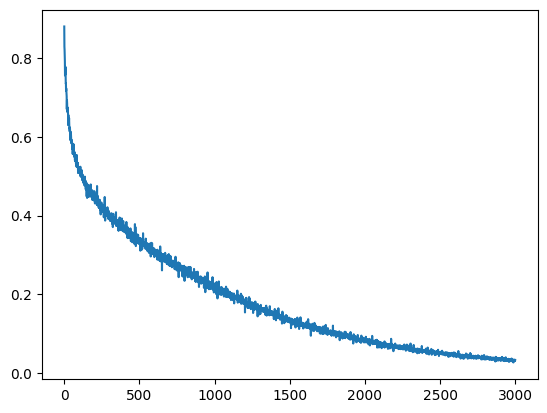

In [ ]:
y_pred = predict_1(nn_trained,x_v)
predict_acc_pure(y_pred, y_v)
predict_f1_pure(y_pred, y_v)
plt.figure()
plt.plot(loss)

Epoch: 0 Loss: 0.4222639641405998 Validation F1: [0.22551252847380415, 0.2743362831858407, 0.30990990990990996, 0.3463203463203463, 0.4043715846994535, 0.4081632653061224, 0.4, 0.3707865168539325, 0.22388059701492535] Validation Acc: [0.4662480376766091, 0.6138147566718996, 0.6993720565149136, 0.7629513343799058, 0.8288854003139717, 0.8634222919937206, 0.8916797488226059, 0.9120879120879121, 0.9183673469387755]
Epoch: 2 Loss: 0.2536075848646524 Validation F1: [0.2796992481203007, 0.3051470588235294, 0.3367983367983368, 0.36231884057971014, 0.39106145251396646, 0.41721854304635764, 0.3938223938223938, 0.39449541284403666, 0.3536585365853659] Validation Acc: [0.6240188383045526, 0.7032967032967034, 0.749607535321821, 0.792778649921507, 0.8288854003139717, 0.8618524332810047, 0.8767660910518054, 0.8963893249607535, 0.9167974882260597]
Epoch: 4 Loss: 0.11357894595936015 Validation F1: [0.3458646616541353, 0.38271604938271603, 0.38461538461538464, 0.38056680161943324, 0.36607142857142855, 0

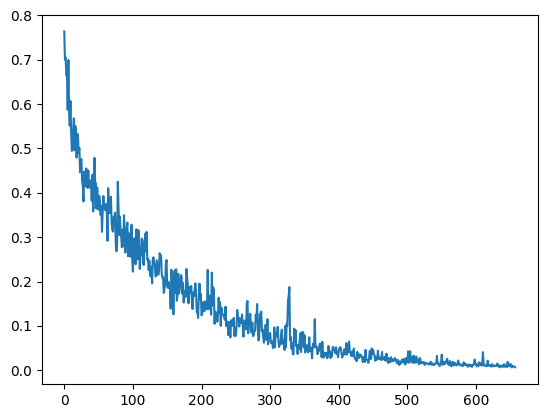

In [ ]:
x_t, y_t, x_v, y_v = split_data(x_train_processed, y_train_processed, 0.8)
x_t, y_t = data_augmentation(x_t, y_t)
# x_t, _, _, _= pca(x_t, 100)
nn = initialize_network(input_size=np.shape(x_t)[1], hidden_size1=512, hidden_size2=128, hidden_size3=32, output_size=1)
nn_trained, loss = train(nn, x_t, y_t, x_v, y_v, learning_rate=0.05, epochs=1000, batch_size=200)
# y_pred = predict_1(nn_trained,x_v)
# predict_acc_pure(y_pred, y_v)
# predict_f1_pure(y_pred, y_v)
plt.figure()
plt.plot(loss)

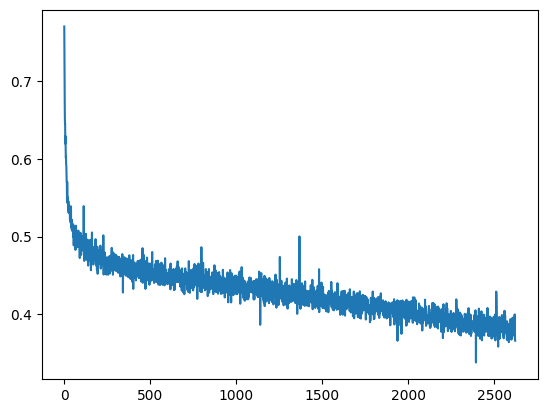

In [ ]:
np.savez("./with_one_hot_deeper", network=nn_trained)
nn_trained
plt.figure()
plt.plot(loss)

In [ ]:
import pandas as pd
last_pred = pd.read_csv('./submission_NN.csv')
last_pred = last_pred.to_numpy()
print(sum(test_pred==last_pred[:, 1]))
print(test_pred.shape)

99355
(109379,)


In [ ]:
a2 = forward_propagation(nn_trained, x_v)[-1]
    
    
y_pred = (np.squeeze(a2) > 0).astype(int)
predict_acc_pure(y_pred, y_v)
predict_f1_pure(y_pred, y_v)


The Accuracy is: 0.0000
The F1 score is: 0.1550
The precision is: 0.0840
The recall is: 1.0000


0.15496017378711077

In [ ]:
y_pred = predict(nn_trained,x_v)

In [ ]:
y_v.mean()

0.08398744113029827

### Test NN ### 

### Test NN Class ###

Epoch: 0 Loss: 0.30399929167119044 Validation F1: [0.23786955243773114, 0.14312770198224647, 0.006341377289293535, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] Validation Acc: [0.6282240815299447, 0.9003837443381983, 0.9112827126321087, 0.9115815299446401, 0.9116129843985908, 0.9116129843985908, 0.9116129843985908, 0.9116129843985908, 0.9116129843985908]
Epoch: 2 Loss: 0.2702457749608806 Validation F1: [0.2786890875922615, 0.25982461361713866, 0.051006710333372396, 0.0024844719965836553, 0.0, 0.0, 0.0, 0.0, 0.0] Validation Acc: [0.6715054101660796, 0.8924729491696024, 0.9110468042274786, 0.9115972571716155, 0.9116129843985908, 0.9116129843985908, 0.9116129843985908, 0.9116129843985908, 0.9116129843985908]
Epoch: 4 Loss: 0.27577714761589656 Validation F1: [0.2938610020713492, 0.31786315943287047, 0.14273049363647475, 0.018178639750969772, 0.0, 0.0, 0.0, 0.0, 0.0] Validation Acc: [0.6767268495218923, 0.8791048062405636, 0.908750629089079, 0.9116601660795168, 0.9115972571716155, 0.9116129843985908, 0.91

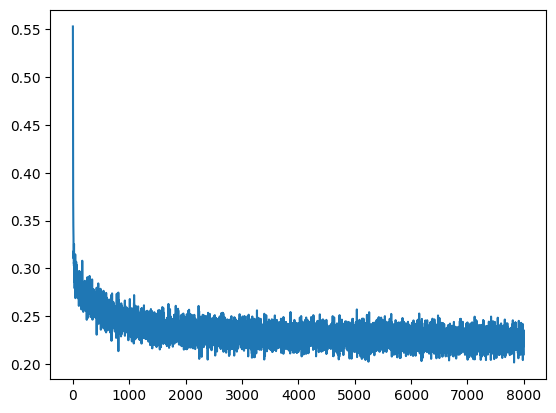

In [6]:
x_t, y_t, x_v, y_v = split_data(x_train_processed, y_train_processed, 0.8)
# x_t, y_t = data_augmentation(x_t, y_t)
# x_t, _, _, _= pca(x_t, 100)
nn = NeuralNetwork([np.shape(x_t)[1], 400, 200, 100, 4, 1],'sigmoid','bce',adam=False)
nn_trained, loss = nn.train(x_t, y_t, x_v, y_v, learning_rate=0.03, epochs=1000, batch_size=4062)
# y_pred = predict_1(nn_trained,x_v)
# predict_acc_pure(y_pred, y_v)
# predict_f1_pure(y_pred, y_v)
plt.figure()
plt.plot(loss)

In [7]:
np.savez("./no_aug", network=nn_trained)

### Test Submission ###

In [9]:
nn = NeuralNetwork.from_saved_weights('./no_aug.npz')
best_thre = nn.network[-1]['best_threshold']
test_pred = nn.predict_submission(x_test_processed, custom_threshold=best_thre)
create_csv_submission(test_ids, test_pred, 'no_aug.csv')

In [24]:
nn.network[3]['W'].shape

(100, 4)

In [ ]:
np.unique(test_pred)
np.sum(test_pred==1)  

17092

In [ ]:
new_pred = np.loadfromcsv('./submission_4_layer_normalize.csv')

NameError: name 'test_pred' is not defined

### Cross Validation ###

In [5]:
# Random Guess
sub_x, sub_y = split_cross_validation(x_train, y_train_processed, 10)
# generate random predictions for each fold
accs = []
f1 = []
for i in range(5):
    pred = []
    pred = np.zeros(sub_y[i].shape)
    accs.append(predict_acc_pure(pred, sub_y[i]))
    f1.append(predict_f1_pure(pred, sub_y[i]))

print("Final accuracy score is: ", np.mean(accs))
print("std of accuracy score is: ", np.std(accs))
print("Final f1 score is: ", np.mean(f1))
print("std of f1 score is: ", np.std(f1))

Final accuracy score is:  0.9109433487465006
std of accuracy score is:  0.0010537150982820713
Final f1 score is:  0.0
std of f1 score is:  0.0


In [14]:
sub_y[i].shape

(63585,)

In [15]:
pred.shape

(63585,)

In [8]:
# Nerual Network  
sub_x, sub_y = split_cross_validation(x_train_processed, y_train_processed, 10)
nn = NeuralNetwork.from_saved_weights('./no_aug.npz')
best_thre = nn.network[-1]['best_threshold']

accs = []
f1 = []
for i in range(10):
    pred = []
    pred = nn.predict_submission(sub_x, custom_threshold=best_thre)
    accs.append(predict_acc_pure(pred, sub_y[i]))
    f1.append(predict_f1_pure(pred, sub_y[i]))

print("Final accuracy score is: ", np.mean(accs))
print("std of accuracy score is: ", np.std(accs))
print("Final f1 score is: ", np.mean(f1))
print("std of f1 score is: ", np.std(f1))

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (10,) + inhomogeneous part.